# Étude de la Perte de Huber avec SymPy et Python
## 1. Introduction

La fonction de perte est un élément central en apprentissage automatique. Elle mesure l’écart entre les prédictions du modèle et les vraies valeurs.

La perte de Huber est utilisée en régression robuste. Elle combine les avantages :

de la MSE (Mean Squared Error) : sensible aux petites erreurs,

de la MAE (Mean Absolute Error) : robuste aux grandes erreurs (outliers).

Elle est définie par :
$$
L_\delta(y, \hat{y}) =
\begin{cases}
\frac{1}{2} (y - \hat{y})^2 & \text{si } |y - \hat{y}| \leq \delta \\
\delta (|y - \hat{y}| - \frac{\delta}{2}) & \text{sinon}
\end{cases}
$$

où :

y est la vraie valeur,

𝑦^​ est la prédiction,

δ>0 est un hyperparamètre de seuil

## 2. Gradient de la Perte de Huber

In [7]:
import sympy as sp

# Déclaration des variables
y, y_hat, delta = sp.symbols('y y_hat delta', positive=True)
error = y - y_hat

# Définition de la perte de Huber
huber_loss = sp.Piecewise(
    ((1/2) * error**2, sp.Abs(error) <= delta),
    (delta*(sp.Abs(error) - delta/2), True)
)

# Gradient par rapport à y_hat
grad_huber = sp.diff(huber_loss, y_hat)
grad_huber

Piecewise((-1.0*y + 1.0*y_hat, delta >= Abs(y - y_hat)), (-delta*sign(y - y_hat), True))

#### Résultat attendu :

$$
\frac{\partial L_\delta}{\partial \hat{y}} =
\begin{cases}
-(y - \hat{y}) & \text{si } |y - \hat{y}| \leq \delta \\
-\delta \cdot \text{sign}(y - \hat{y}) & \text{sinon}
\end{cases}
$$

## 3. Convexité de la perte de Huber

In [8]:
# Dérivée seconde pour vérifier la convexité
second_derivative = sp.diff(huber_loss, y_hat, 2)
second_derivative

Piecewise((1.0, delta >= Abs(y - y_hat)), (2*delta*DiracDelta(y - y_hat), True))

#### Analyse de convexité

\begin{cases}
\text{Pour } |y - \hat{y}| \leq \delta \text{, la fonction est quadratique} \rightarrow \frac{\partial^2 L}{\partial \hat{y}^2} = 1 > 0 \rightarrow \text{convexe} \\
\\
\text{Pour } |y - \hat{y}| > \delta \text{, la fonction est linéaire} \rightarrow \frac{\partial^2 L}{\partial \hat{y}^2} = 0 \rightarrow \text{convexe aussi}
\end{cases}

#### Conclusion : la perte de Huber est convexe.
## 4. Jeux de données (régression et classification)

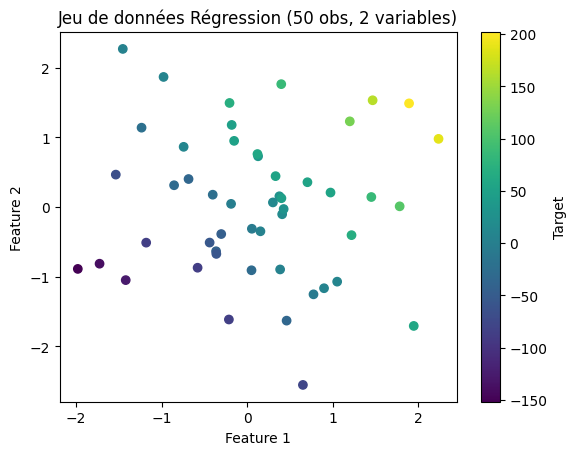

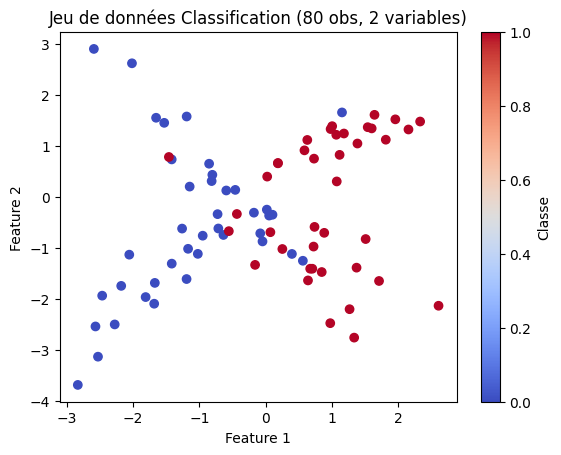

In [9]:
from sklearn.datasets import make_regression, make_classification
import matplotlib.pyplot as plt

# Jeu de données de régression (2 features, 50 obs)
X_reg, y_reg = make_regression(n_samples=50, n_features=2, noise=10, random_state=0)

# Jeu de données de classification (2 features, 80 obs)
X_clf, y_clf = make_classification(
    n_samples=80,
    n_features=2,
    n_classes=2,
    n_informative=2,  # toutes les features sont informatives
    n_redundant=0,
    n_repeated=0,
    random_state=0
)

# Visualisation régression
plt.scatter(X_reg[:,0], X_reg[:,1], c=y_reg, cmap="viridis")
plt.title("Jeu de données Régression (50 obs, 2 variables)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Target")
plt.show()

# Visualisation classification
plt.scatter(X_clf[:,0], X_clf[:,1], c=y_clf, cmap="coolwarm")
plt.title("Jeu de données Classification (80 obs, 2 variables)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Classe")
plt.show()


## 5. Courbes de la Perte de Huber

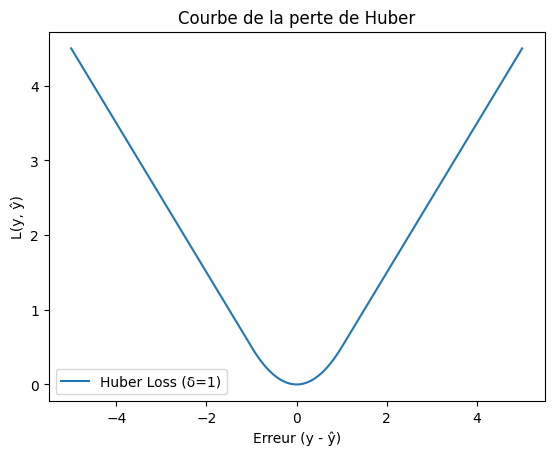

In [10]:
import numpy as np

# Fonction Huber en Python
def huber_loss_func(error, delta=1.0):
    if abs(error) <= delta:
        return 0.5 * error**2
    else:
        return delta * (abs(error) - delta/2)

# Génération des points
errors = np.linspace(-5, 5, 200)
losses = [huber_loss_func(e, delta=1) for e in errors]

# Tracé
plt.plot(errors, losses, label="Huber Loss (δ=1)")
plt.title("Courbe de la perte de Huber")
plt.xlabel("Erreur (y - ŷ)")
plt.ylabel("L(y, ŷ)")
plt.legend()
plt.show()


## 6. Tangente à une ellipse

Une ellipse est définie par:
$$
\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1
$$
La tangente en un point $(x_0, y_0)$ est :
$$
\frac{x x_0}{a^2} + \frac{y y_0}{b^2} = 1
$$

In [11]:
a, b, x, y = sp.symbols('a b x y')
x0, y0 = 2, 1  # Exemple point
tangent_eq = (x0/a**2)*x + (y0/b**2)*y - 1
tangent_eq


-1 + y/b**2 + 2*x/a**2

#### Résultat attendu :
$$
\frac{x}{a^2} + \frac{y}{b^2} = 1
$$

## 7. Conclusion

-La perte de Huber est une fonction convexe qui combine la sensibilité de la MSE aux petites erreurs et la robustesse de la MAE face aux grandes erreurs.

-Son gradient est simple et robuste.

-Elle est très utilisée en régression robuste, notamment en présence de valeurs extrêmes.

-Nous avons illustré ses propriétés sur de petits jeux de données de régression et classification.

-En bonus, nous avons étudié la tangente à une ellipse comme application de calcul symbolique.